In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# EDA

In [20]:
data=pd.read_csv("weather_data.csv")
data.head(5)

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,2025-01-15T12:00:00,25.9,18.7,0,0,NNW,51,...,0,350,0,0,0.00000,11.9,2025-01-15T07:00:00,Few clouds,801,c02n
1,385,87,0.0,2025-01-15T15:00:00,29.3,22.8,748,0,NNW,41,...,0,360,0,0,384.62994,11.9,2025-01-15T10:00:00,Clear Sky,800,c01d
2,542,101,0.0,2025-01-15T18:00:00,36.5,32.0,831,0,NNW,30,...,0,340,0,0,542.37920,9.6,2025-01-15T13:00:00,Few clouds,801,c02d
3,193,65,0.0,2025-01-15T21:00:00,38.3,35.6,581,0,NW,28,...,0,310,0,0,192.98000,6.9,2025-01-15T16:00:00,Clear Sky,800,c01d
4,0,0,0.0,2025-01-16T00:00:00,29.3,27.5,0,0,W,46,...,0,280,0,0,0.00000,2.0,2025-01-15T19:00:00,Few clouds,801,c02n


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [22]:
data.describe()

,ghi,dhi,precip,temp,app_temp,dni,snow_depth,rh,pop,ozone,...,pres,dewpt,uv,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,code
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.00000,40.000000,40.000000,40.0,40.00000,40.000000,40.000000,40.00000
mean,142.300000,31.875000,0.003625,37.200000,35.140000,271.675000,0.0,69.800000,7.625000,318.750000,...,1011.825000,27.137500,0.70000,24.975000,265.875000,0.0,30.37500,114.497583,8.070000,769.80000
std,206.094477,42.657363,0.008548,7.995223,9.249665,360.709656,0.0,21.294275,15.441681,21.042996,...,5.848022,11.898517,1.01779,40.780518,63.467006,0.0,42.95059,175.889617,3.618202,117.68258
min,0.000000,0.000000,0.000000,21.900000,18.700000,0.000000,0.0,28.000000,0.000000,292.000000,...,1003.000000,8.100000,0.00000,0.000000,160.000000,0.0,0.00000,0.000000,1.100000,301.00000
25%,0.000000,0.000000,0.000000,31.450000,27.450000,0.000000,0.0,54.750000,0.000000,303.750000,...,1006.750000,18.450000,0.00000,0.000000,210.000000,0.0,0.00000,0.000000,5.800000,801.00000
50%,0.000000,0.000000,0.000000,37.600000,34.700000,0.000000,0.0,75.500000,0.000000,311.500000,...,1013.000000,27.300000,0.00000,0.000000,265.000000,0.0,0.00000,0.000000,8.300000,801.00000
75%,251.500000,72.000000,0.000000,44.175000,42.850000,635.500000,0.0,84.500000,0.000000,332.500000,...,1016.000000,38.650000,1.25000,40.750000,330.000000,0.0,71.25000,193.830832,10.800000,803.00000
max,557.000000,102.000000,0.040000,50.200000,50.200000,836.000000,0.0,100.000000,55.000000,371.000000,...,1023.000000,45.300000,3.00000,100.000000,360.000000,0.0,100.00000,549.339200,15.700000,804.00000


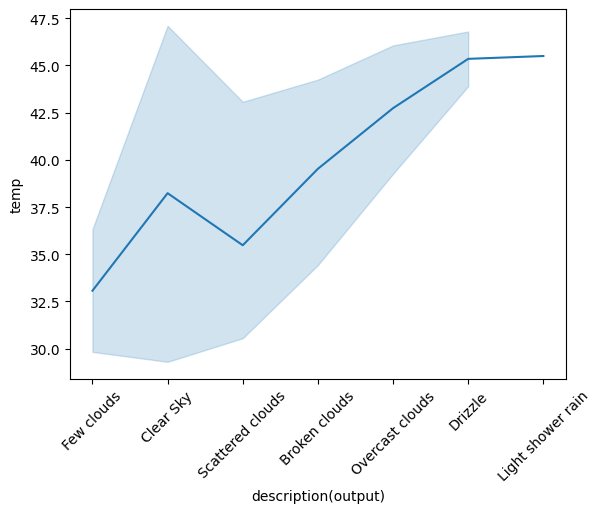

In [23]:
sns.lineplot(y="temp",x="description(output)",data=data)
plt.xticks(rotation=45)
plt.show()

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_38960/2315525507.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="description(output)",data=data,palette="dark")


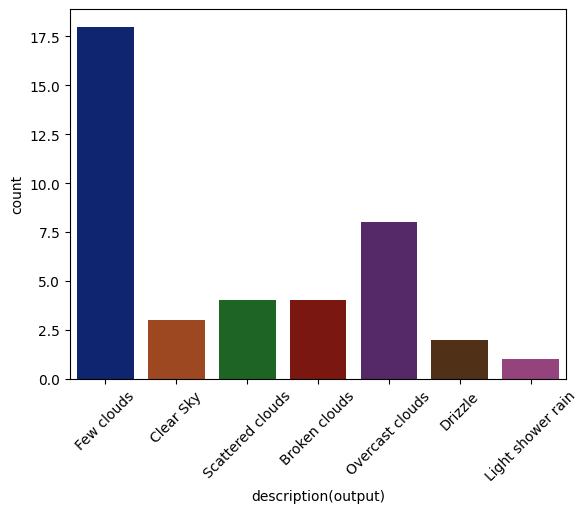

In [24]:
sns.countplot(x="description(output)",data=data,palette="dark")
plt.xticks(rotation=45)
plt.show()

In [25]:
data=data.drop(["timestamp_utc","timestamp_local","datetime","snow_depth","snow"],axis=1)

# Feature Engineering

In [26]:
le=LabelEncoder()
data["wind_cdir"]=le.fit_transform(data["wind_cdir"])
data["pod"]=le.fit_transform(data["pod"])
data["wind_cdir_full"]=le.fit_transform(data["wind_cdir_full"])
data["description(output)"]=le.fit_transform(data["description(output)"])
data["icon"]=le.fit_transform(data["icon"])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   temp                 40 non-null     float64
 4   app_temp             40 non-null     float64
 5   dni                  40 non-null     int64  
 6   wind_cdir            40 non-null     int64  
 7   rh                   40 non-null     int64  
 8   pod                  40 non-null     int64  
 9   pop                  40 non-null     int64  
 10  ozone                40 non-null     int64  
 11  clouds_hi            40 non-null     int64  
 12  clouds               40 non-null     int64  
 13  vis                  40 non-null     float64
 14  wind_spd             40 non-null     float64
 15  wind_cdir_full       40 non-null     int64

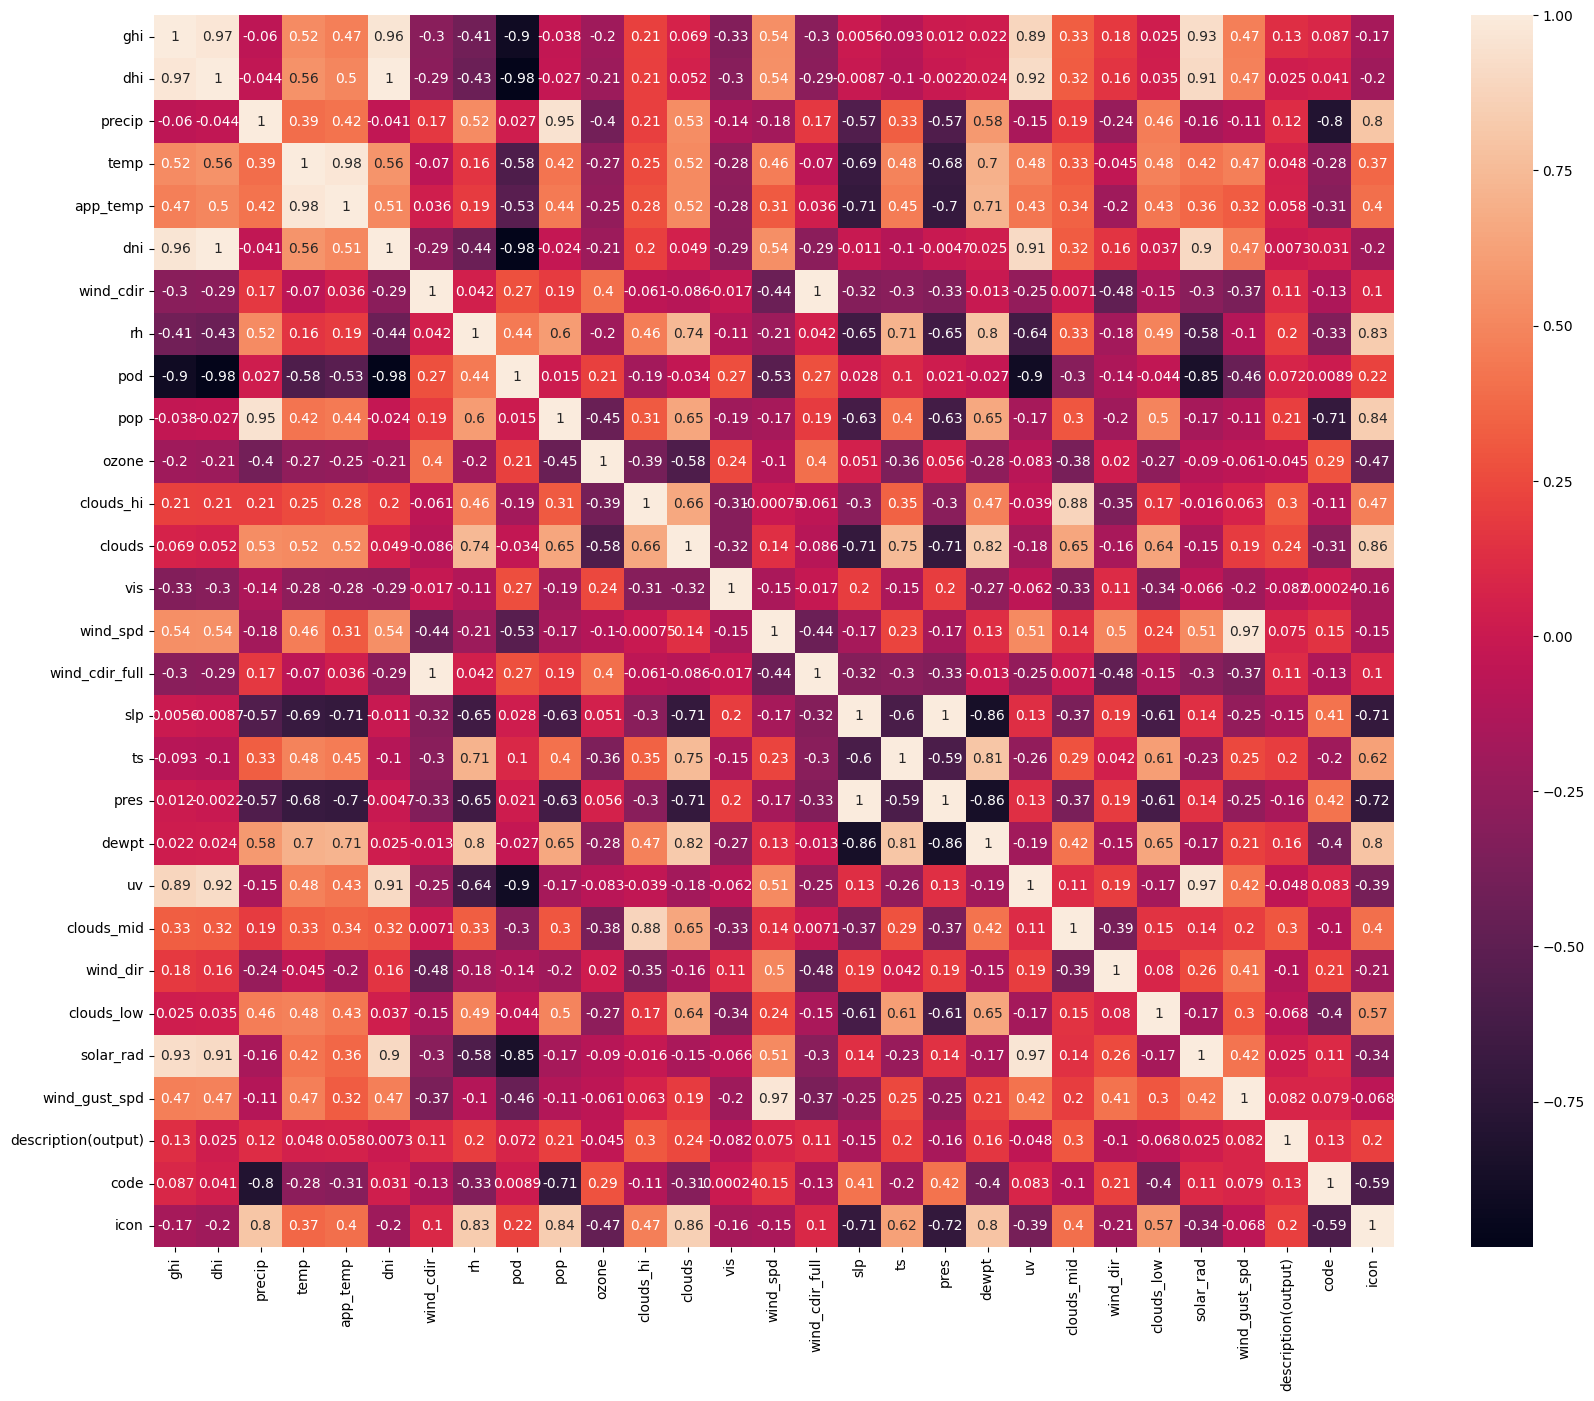

In [28]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [29]:
data.corr()

,ghi,dhi,precip,temp,app_temp,dni,wind_cdir,rh,pod,pop,...,dewpt,uv,clouds_mid,wind_dir,clouds_low,solar_rad,wind_gust_spd,description(output),code,icon
ghi,1.000000,0.973381,-0.060383,0.519399,0.467180,0.963171,-0.296018,-0.407017,-0.902736,-0.038323,...,0.022301,0.890953,0.326670,0.178317,0.025460,0.928353,0.472302,0.126959,0.086645,-0.170327
dhi,0.973381,1.000000,-0.044435,0.557907,0.503571,0.999151,-0.293057,-0.434738,-0.976963,-0.026543,...,0.024344,0.915113,0.324507,0.161710,0.035238,0.910263,0.473363,0.025380,0.040540,-0.199555
precip,-0.060383,-0.044435,1.000000,0.393772,0.417134,-0.040816,0.172639,0.521092,0.026768,0.945957,...,0.584798,-0.151790,0.192258,-0.238780,0.463802,-0.157816,-0.105418,0.116702,-0.804255,0.798677
temp,0.519399,0.557907,0.393772,1.000000,0.975625,0.561393,-0.069857,0.156690,-0.577580,0.424825,...,0.704686,0.478950,0.325497,-0.044745,0.478198,0.419342,0.465439,0.047776,-0.281804,0.369583
app_temp,0.467180,0.503571,0.417134,0.975625,1.000000,0.506880,0.035504,0.189038,-0.525822,0.443650,...,0.713316,0.431099,0.344336,-0.195782,0.430248,0.364959,0.322297,0.057847,-0.308896,0.398816
dni,0.963171,0.999151,-0.040816,0.561393,0.506880,1.000000,-0.291037,-0.436885,-0.984723,-0.023758,...,0.024696,0.914314,0.322675,0.158357,0.036522,0.902219,0.471282,0.007262,0.031221,-0.203324
wind_cdir,-0.296018,-0.293057,0.172639,-0.069857,0.035504,-0.291037,1.000000,0.041898,0.272771,0.190684,...,-0.012707,-0.253000,0.007126,-0.483118,-0.150251,-0.295778,-0.371979,0.112822,-0.133720,0.100153
rh,-0.407017,-0.434738,0.521092,0.156690,0.189038,-0.436885,0.041898,1.000000,0.444527,0.600907,...,0.804842,-0.642886,0.327980,-0.181529,0.486130,-0.576583,-0.103114,0.196625,-0.334869,0.830670
pod,-0.902736,-0.976963,0.026768,-0.577580,-0.525822,-0.984723,0.272771,0.444527,1.000000,0.014817,...,-0.027416,-0.899211,-0.304414,-0.137507,-0.044291,-0.851095,-0.456025,0.071719,0.008888,0.217063
pop,-0.038323,-0.026543,0.945957,0.424825,0.443650,-0.023758,0.190684,0.600907,0.014817,1.000000,...,0.654665,-0.168858,0.298164,-0.199283,0.496043,-0.170141,-0.112140,0.207460,-0.711979,0.839813


In [30]:
x=data.drop(["description(output)"],axis=1)
y=data["description(output)"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model 

In [46]:
classifier={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier()
}

In [47]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}:")
    print(accuracy*100)

Logistic Regression:
75.0
Random Forest Classifier:
75.0
Decision Tree Classifier:
87.5
Ada Boost Classifier:
87.5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting Classifier:
87.5


In [48]:
result=pd.DataFrame({
    "Model":["Logistic Regression","Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier","Gradient Boosting Classifier"],
    "Accuracy":[75.00,75.00,87.5,87.5,87.5]
})

# Result

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_38960/2978770832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy",y="Model",data=result,palette="Blues")


<Axes: xlabel='Accuracy', ylabel='Model'>

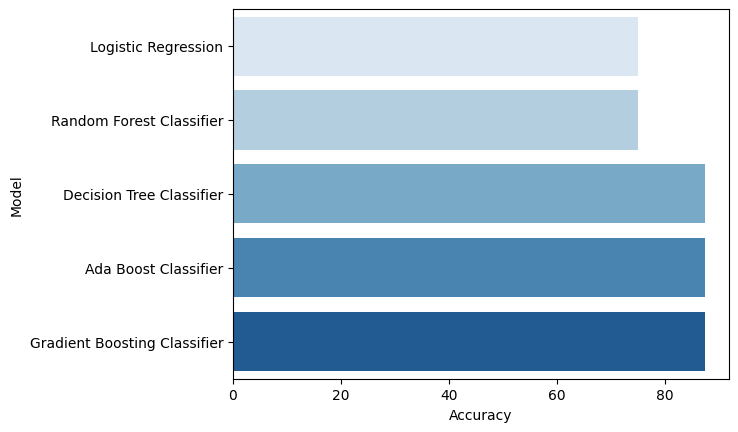

In [51]:
sns.barplot(x="Accuracy",y="Model",data=result,palette="Blues")